# 1. 선형/비선형 여부는 독립 변수가 한 개인지 여러개인지에 따라 나뉜다.
## (O/X 문제, 답에 대한 이유를 적으시오)
X, 회귀계수가 선형이냐 아니냐에 따라 선형/비선형 여부가 나뉘고, 독립변수의 개수에 따라서는 단일 회귀와, 다중 회귀로 나뉘어진다.
# 2. RSS 에 간략하게 적으시오
RSS(Residual Sum of Square), 오류 값의 제곱을 구해서 더하는 방식, 일반적으로 미분 등의 계산을 편하게 하기 위해 사용
Error^2 = RSS
# 3. RSS는 회귀식의 독립변수 X, 종속변수Y 가 중심변수이다.
## (O/X 문제, 답에 대한 이유를 적으시오)
X, w변수, 회귀 변수가 중심 변수이다.
# 4. 최적의 회귀 모델을 만든다는 것의 의미를 적으시오
전체 데이터의 잔차(오류값) 합이 최소가 되는 모델을 만드는 것이자 동시에 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는 다는 의미
# 5. 머신러닝 회귀 예측의 핵심은?
주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것, RSS 를 최소로 하는 회귀 계수를 학습을 통해서 찾는 것
# 6. 경사 하강법의 핵심과 원리를 간략하게 적으시오
핵심: 오류가 작아지는 방향으로 w 값을 보정하는 것, 비용함수가 최소가 되는 값을 찾는다.

원리: 미분된 1차 함수의 기울기가 감소하지 않는 지접을 비용함수가 최소인 지점으로 반환하고 그 때의 w를 반환한다.
경사하강법 계산을 여러번 반복해서 w값을 변경하며 학습시킨다.
# 7. 다중공선성 문제의 정의와 해결방법을 적으시오
정의: 피처 간의 상관관계가 매우 높은 경우 분산이 커져서 오류에 민감해지는 현상

해결 방법: 독립적인 중요한 피처만 남기고 제거하거나 규제를 사용하거나, PCA를 통해 차원 축소를 수행한다.
# 8. 회귀 평가 지표 4가지를 간략하게 적으시오
1. MAE: 실제값과 예측값의 차이를 절댓값으로 변환해 평균한것
2. MSE: 실제값과 예측값의 차이를 제곱해 평균한것
3. RMSE: MSE에 루트를 씌운것
4. R^2: 분산 기반으로 예측 성능을 평가하는 것, 에측값 분산/실제값 분산, 1에 가까울 수록 정확도가 높다.

# 9. neg_mean_absolute_error 가 음수값을 반환하는 이유를 적으시오
사이킷런의 Scoring 함수가 score 값이 클수록 좋은 평가 결과로 자동 평가하기 때문이다.
오류 차이를 기반으로한다면 오류 값이 클 수록 나쁜 결과인데 이를 Scoring 함수에 그대로 넣게 되면 좋은 성능이 되기때문에
이를 거꾸로 적용하기 위하여 -1을 곱해주는 것이다.
# 10. 차수와 편향과 분산, 과소적합, 과적합들의 관계를 적으시오
차수가 낮아지면 편향은 높아지고 분산은 낮아지고 과소적합이되는 경향이 있다.
차수가 높아지면 편향은 낮아지고 분산은 높아지고 과적합이 되는 경향이 있다.
# 11. 회귀 계수의 크기를 제어하고 RSS 최소화 방법을 사용하는 비용함수의 목표를 적으시오
RSS(W) + alpha*||W||^2_2 를 최소화하는 것
# 12. 릿지 회귀는 alpha 값이 커질수록 회귀 계수를 작게 만든다.
## (O/X 문제, 답에 대한 이유를 적으시오)
O, 알파값이 커지면, alpha*||W||^2_2 얘도 커져서 W를 작게 만들어 줘야하기 때문이다.
# 13. 로지스틱 함수는 선형 회귀방식을 따르고 회귀 최적선을 찾는다.
## (O/X 문제, 답에 대한 이유를 적으시오)
X, 로지스틱 회귀는 선형 회귀 방식을 기반으로 하되, 시그모이드 함수를 이용해 분류를 수행하는 회귀이다.

# 14. 중고차 가격 예측 회귀 실습 (밑의 순서대로 진행할것)

In [30]:
# 중고차 가격예측
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

df= pd.read_csv('used_car_train-data.csv')
print(df.shape)
df.head(3)

(6019, 14)


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


## 1. 데이터 전처리
### (1) Year를 datetime 형식으로 변환하기

In [32]:
# 문자열을 datetime 타입으로 변경. 
df['Year'] = df.Year.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
df['Year'] = df.Year.apply(lambda x : x.year)
df.head(3)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,1970,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,1970,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,1970,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50


### (2) 'Unnamed: 0','New_Price', 'Transmission', 'Engine', 'Seats', 'Power' 칼럼 삭제하기

In [33]:
drop_columns = ['Unnamed: 0','New_Price', 'Transmission', 'Engine', 'Seats', 'Power']
df.drop(drop_columns, axis=1,inplace=True)

## Name과 Mileage 필요한 부분만 추출하기

In [34]:
names = list(df.Name)
mileage = list(df.Mileage)

for i in range(len(names)):
    names[i] = names[i].split(' ')[0]
df.Name =names

for i in range(len(names)):
    mileage[i] = str(mileage[i]).split(' ')[0]   
df.Mileage= mileage

df.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Price
0,Maruti,Mumbai,1970,72000,CNG,First,26.6,1.75
1,Hyundai,Pune,1970,41000,Diesel,First,19.67,12.50
2,Honda,Chennai,1970,46000,Petrol,First,18.2,4.50


### (3) Price, Kilometers_Driven, Mileage float 형으로 변환하기

In [35]:
df['Price'] = df['Price'].astype(float)
df['Kilometers_Driven'] = df['Kilometers_Driven'].astype(float)
df['Mileage'] = df['Mileage'].astype(float)

### (4) null 값 없애기

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   float64
 4   Fuel_Type          6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   float64
 7   Price              6019 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 376.3+ KB


In [37]:
null_names = np.array([ i for i in df.isna().sum().index if df.isna().sum()[i] !=0 ])

print(type(null_names))
null_names

<class 'numpy.ndarray'>


array(['Mileage'], dtype='<U7')

In [38]:
for null_name in null_names:
    df[null_name].fillna(df[null_name].mean(), inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   float64
 4   Fuel_Type          6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6019 non-null   float64
 7   Price              6019 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 376.3+ KB


### (5) get_dummise를 이용해서 'Year', 'Name','Location', 'Fuel_Type', 'Owner_Type' 인코딩하기

In [40]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

y_target = df['Price']
X_features = df.drop(['Price'],axis=1,inplace=False)

X_features_ohe = pd.get_dummies(X_features, columns=['Year', 'Name','Location', 'Fuel_Type', 'Owner_Type'])

## 2. 사이킷런의 LinearRegression 객체를 이용해서 회귀 예측하기

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred)

RMSLE: 0.510, RMSE: 7.416, MAE: 3.898


## 3. Target 값인 Price가 정규 분포를 이루는지 확인하기.
## 왜곡되어 있다면, 로그를 적용해서 변환해주기

In [43]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count    diff
1495      120.00              9.0  111.00
1514       93.00             26.0   67.00
1059       93.67             28.0   65.67
411        85.00             25.0   60.00
1786       97.07             43.0   54.07


<AxesSubplot:>

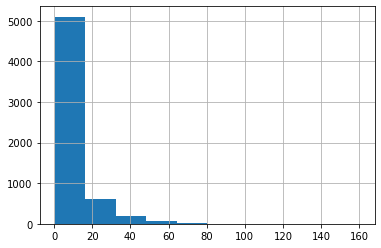

In [44]:
y_target.hist()

<AxesSubplot:>

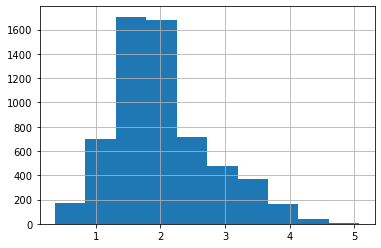

In [45]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

## 4. 변환한 값을 가지고 다시 사이킷런의 LinearRegression, Ridge, Lasso 객체들를 이용해서 학습학하고 예측 성능 확인하기

In [46]:
# 타겟 컬럼인 count 값을 log1p 로 Log 변환
y_target_log = np.log1p(y_target)

X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict    

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 0.413, RMSE: 7.468, MAE: 3.571
### Ridge ###
RMSLE: 0.414, RMSE: 7.417, MAE: 3.544
### Lasso ###
RMSLE: 0.490, RMSE: 8.684, MAE: 4.162


## 회귀계수 시각화

<AxesSubplot:>

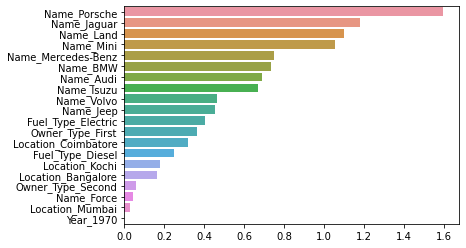

In [47]:
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

## 5. 변환한 값을 가지고 회귀 트리인 랜덤 포레스트, GBM, XGBoost, LightGBM을 순차적으로 성능 평가해보기

In [48]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.335, RMSE: 6.535, MAE: 2.734
### GradientBoostingRegressor ###
RMSLE: 0.311, RMSE: 6.263, MAE: 2.623
### XGBRegressor ###
RMSLE: 0.301, RMSE: 5.942, MAE: 2.478
### LGBMRegressor ###
RMSLE: 0.309, RMSE: 6.215, MAE: 2.648


In [69]:
rf_reg.fit(X_train,y_train)
xgb_reg.fit(X_train, y_train)
gbm_reg.fit(X_train,y_train)
lgbm_reg.fit(X_train,y_train)
print("랜덤 포레스트:", round(rf_reg.score(X_test, y_test)*100))
print("GBM:", round(gbm_reg.score(X_test, y_test)*100))
print("XGBoost:", round(xgb_reg.score(X_test, y_test)*100))
print("LightGBM:",round(lgbm_reg.score(X_test, y_test)*100))

랜덤 포레스트: 80
GBM: 83
XGBoost: 84
LightGBM: 83
